# Coursera_Capstone

### I will be using this notebook for my Coursera_Capstone Assignment

### 1. Introduction

There is a huge impact on the society due to traffic accidents where there is a great cost of fatalities and injuries. In recent years, there is an increase in the researches attention to determine the significantly affect the severity of the drivers injuries in  which is caused due to road accidents.Accurate and comprehensive accident records depends on some factors/ like the accuracy of the data , record retention and data analysis. There is many approaches applied to this scenario to studythis problem.
A recent study illustrated that the residential and shopping sites are more hazardous than the village areas,as might have been predicted, the frequencies of the casualties were higher near the zones of residence possibly because of the higher exposure. A study revealed that the casualty rates among the residential areas are classified as relatively  deprived and significantly higher than those from relatively affluent areas.
Accidents have become very common. Nearly 1.2 million people die in road accidents each year, on average 3287 deaths a day.Moreover,20-50milliom people are injured or disabled annually. Road traffic crashes rank as the 9th leading cause of death and accounts for 2.2% of all the deaths globally. In this contest to better severity of the accidents, machine learning and neural techniques has been used for analysis.Car accidents are one of the most commom types of collision occuring everyday ,  globally.By analysing the different factors which cause the collision.

### 2. Business Understanding 

Car collosion or car accidents is one of the most common types of collision in Road Accidents. According to Corrigan [1], despite collecting large quantities of traffic data, Transportation Departments of all levels are unable to use such data to good effect . Founded in 2015, a start-up called ODN could predict when and where accidents are most likely to happen. Officialscould use such information to direct safety and efforts at the strechers of road where the impacts could be the biggest. In the context of this research , some of the developed countries like UK,US governments cpould use this information generated from a predicted system with a Neural Network predicting the accident severity and use this information to enhance the laws  to build safer roads for the future. In this project, we are dealing with all the possible ways to reach the destination by overcoming Car Accident Severity with the different critical traffic conditions  on the way to journey. By predicting Car Accident SeverityImprove the traffic safety measures and implement the traffic rules accordingly by governments better severity conditions.


### 3. Data Understanding

In [76]:
import pandas as pd
import numpy as np
import sqlite3
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [4]:
print("Hello Coursera Capstone Project")

Hello Coursera Capstone Project


In [21]:
cd C:\Users\User\anaconda3\

C:\Users\User\anaconda3


In [22]:
pwd

'C:\\Users\\User\\anaconda3'

In [84]:
df = pd.read_csv("C:\\Users\\User\\anaconda3\Car_Accident_Severity.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [58]:
df.shape

(194673, 38)

In [64]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [59]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### 4. Data Preparation

In [65]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [66]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### Programming Languages

In a recent worldwide survey, it was found that 83% of 24,000 data proffesssionals used Python. Data Scientists  consider Python because it is a general-purpose and dynamic programming language. It contains ideal packages for Machine Learning tasks and is inherently an Object-Oriented Programming language.

- For the current project Python languages is adapted. The code executed in Jupyter lab in anaconda environment.
- k-Nearest Neighbor Method a machine learning technique is implemented in Python programming language. k-Nearest Neighbor Method whicch is contaaine a number of algorithims used in the process of prediction and the relationship between both dependent and independent variables.
- Then the model is evolved is using Jacob and F-1 square methods.

### Data Visualisation and Analysis

- This chapter  deals with different plots usinng matplotlib,seaborn functions
- The main objective of the data visualisation analysing and finding the possible solutions for Caar Accident Severity

In [85]:
import seaborn as sns

NameError: name 'plot' is not defined

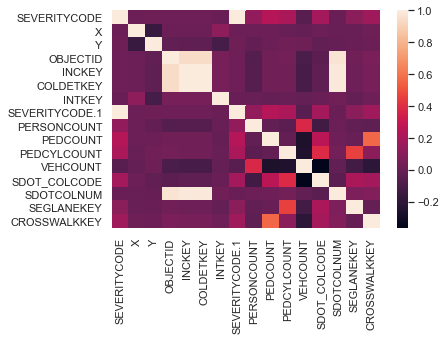

In [86]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.heatmap(df.corr())
plot.show()

### Data Science Methodology

In [80]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [83]:
df.groupby(['Casualty Severity', 'Weather Conditions']).size().groupby(level=0).apply(lambda x:100 * x / x.sum()).unstack().plot(kind='bar', stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter)
plt.show()

KeyError: 'Casualty Severity'